# Exploratory data analysis (EDA)

## Pima Indians Diabetes Database

* Dataset : https://www.kaggle.com/uciml/pima-indians-diabetes-database
* Number of Features (Columns): 9 columns
* Objective: Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?


- Name of Features:
    * Pregnancies: Number of times pregnant
    * Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    * BloodPressureDiastolic blood pressure (mm Hg)
    * SkinThicknessTriceps skin fold thickness (mm)
    * Insulin2-Hour serum insulin (mu U/ml)
    * BMIBody mass index (weight in kg/(height in m)^2)
    * DiabetesPedigreeFunctionDiabetes pedigree function
    * AgeAge (years)
    * OutcomeClass variable (0 or 1) 268 of 768 are 1, the others are 0


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset into a pandas dataFrame.
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Lets have a look to the dimension and columns of our data

In [6]:
print('*******************DataPoints & Fetures*******************************')
print(df.shape)
print('*******************Column Name*******************************')
print(df.columns)

*******************DataPoints & Fetures*******************************
(768, 9)
*******************Column Name*******************************
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


### Lets check if we have any Categorical Feature to handle

As checked we don't have any Categorical Feature to handle But we can discuss it. Most Popular ways to handle it
* OneHotEncoding : Create Dimension to the size equal to  number of Categories present for each category and fill each value as 0 if not present or 1 if present
* Response Coding: Create Dimension to the size equal to number of classes available in dependent variable and fill each value with Prob(category | class)
* Mean Value Replacement: Similar to Response Coding. In place of Probability we use mean.

### Lets check If we have any missing value in the dataset

In [4]:
### False is at most of the places
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [5]:
# Checking if any value is missing in any column
df.isnull().sum(axis=0) # Here axis = 0 by default (for Columns) We can change this to axis = 1 for row value counts

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Feature Selection Techniques


### Lets check if our features are correlated or not

Pearson's correlation coefficient is the covariance of the two variables divided by the product of their standard deviations.
https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

ChiSquared: https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

Other Techniques are: Forward Feature Selection, Chi Squared Test, Model Itself (Model.feature_importance_ for some model), Correlation, We can create model based on single feature to get the accuracy and analyse it.

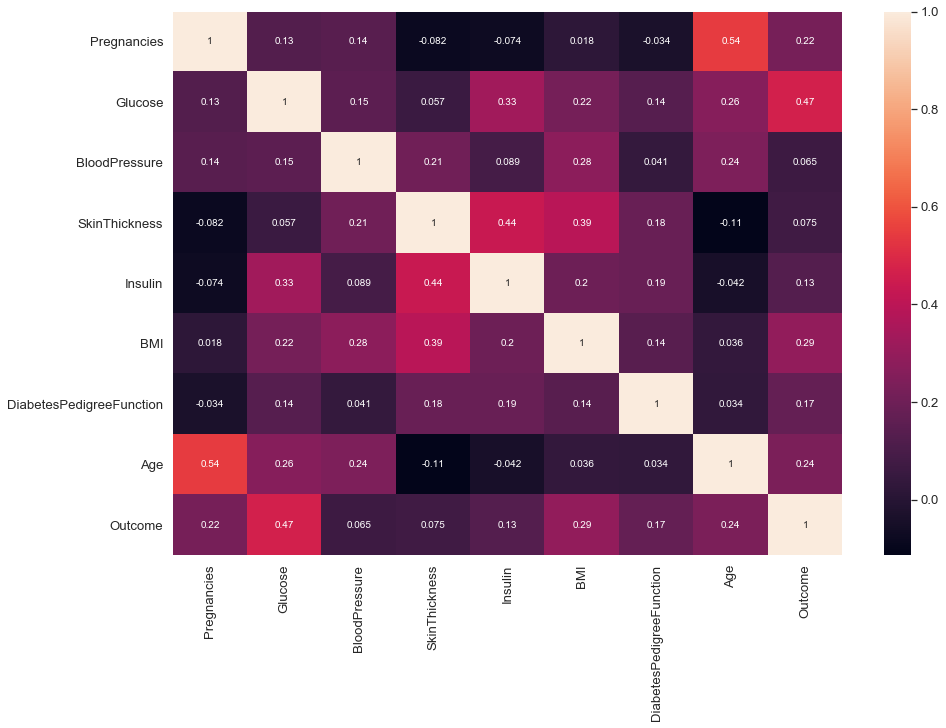

In [203]:
corrMatrix = df.corr()
sns.set(font_scale=1.2)
plt.subplots(figsize=(15,10))
ax = sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 10})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

* As We Can see Glucose>BMI>Age are the important feature to give the outcome likewise sorted


- Some Points Regarding Correlation:
 * We can apply all three type of correlation (pearson(default), spearman rank and kendall
 * We can get correlation for Categorical Data as well. 
 https://datascience.stackexchange.com/questions/893/how-to-get-correlation-between-two-categorical-variable-and-a-categorical-variab
 * There are some methods like: Chi Squared Test, Crammer's V, ANOVA Test   

In [6]:
# To check total number of patient data available
df["Outcome"].value_counts(normalize=True)

# df["Outcome"].value_counts()

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

* As We can see a large portion of patient is not diabetic.
* 65% people are not diabetic and 34% are.
* This is a slight imbalanaced dataset. There are number of methods to handle the imbalanced dataset.
* This is the perfect blog which I can across to handle imbalanced dataset

https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/

* We are not applying any method like oversampling, undersampling, prediction here on the this dataset as of now.
* As we are going to visualize the dataset first and we have number of algorithms which can handle the imbalance dataset also and can be evaluated with different performance metric.


### Lets see some form of 2D-Scatter plot

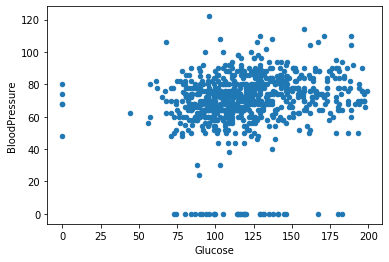

In [72]:
# Plotting the datafram on two of its many feture to have a taste of visualization
# Two Feature:
#     Glucose
#     BloodPressure

df.plot(kind='scatter', x = 'Glucose',y = 'BloodPressure')
plt.show()

* We are not able to extract any information because of the color coding is not enabled. 
* Here we have used dataframe itself to plot its value. Later we will use plotting technique including color coding using Matplotlib and Seaborn


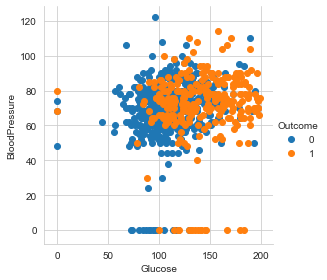

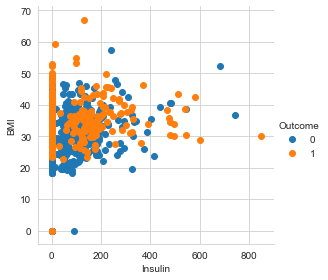

In [80]:
# here we will use seaborn to plot our data value to have some insight of data with color coding.
# Checking if any relation between Glucose and BloodPressure
sns.FacetGrid(df, hue="Outcome", height=4).map(plt.scatter, "Glucose", "BloodPressure").add_legend();
# Checking if any relation between Insulin and BMI
sns.FacetGrid(df, hue="Outcome", height=4).map(plt.scatter, "Insulin", "BMI").add_legend();

* Here We are checking if BloodPressure and Glucose have some value together which can predict the diabetic patient or not
* This give the better interpretation of values with color coding.
* We can have similar scatter plot for different pair of features

### Alternative of 3D-Plot

As a human being we can visualise the data which is more than 2D easily. We can but not easily. So to solve this problem we have found or developed some technique to visualize high dimension dataset like PCA, tSNE.

For now we will look for simple method to visualize the dataset having less number of feature

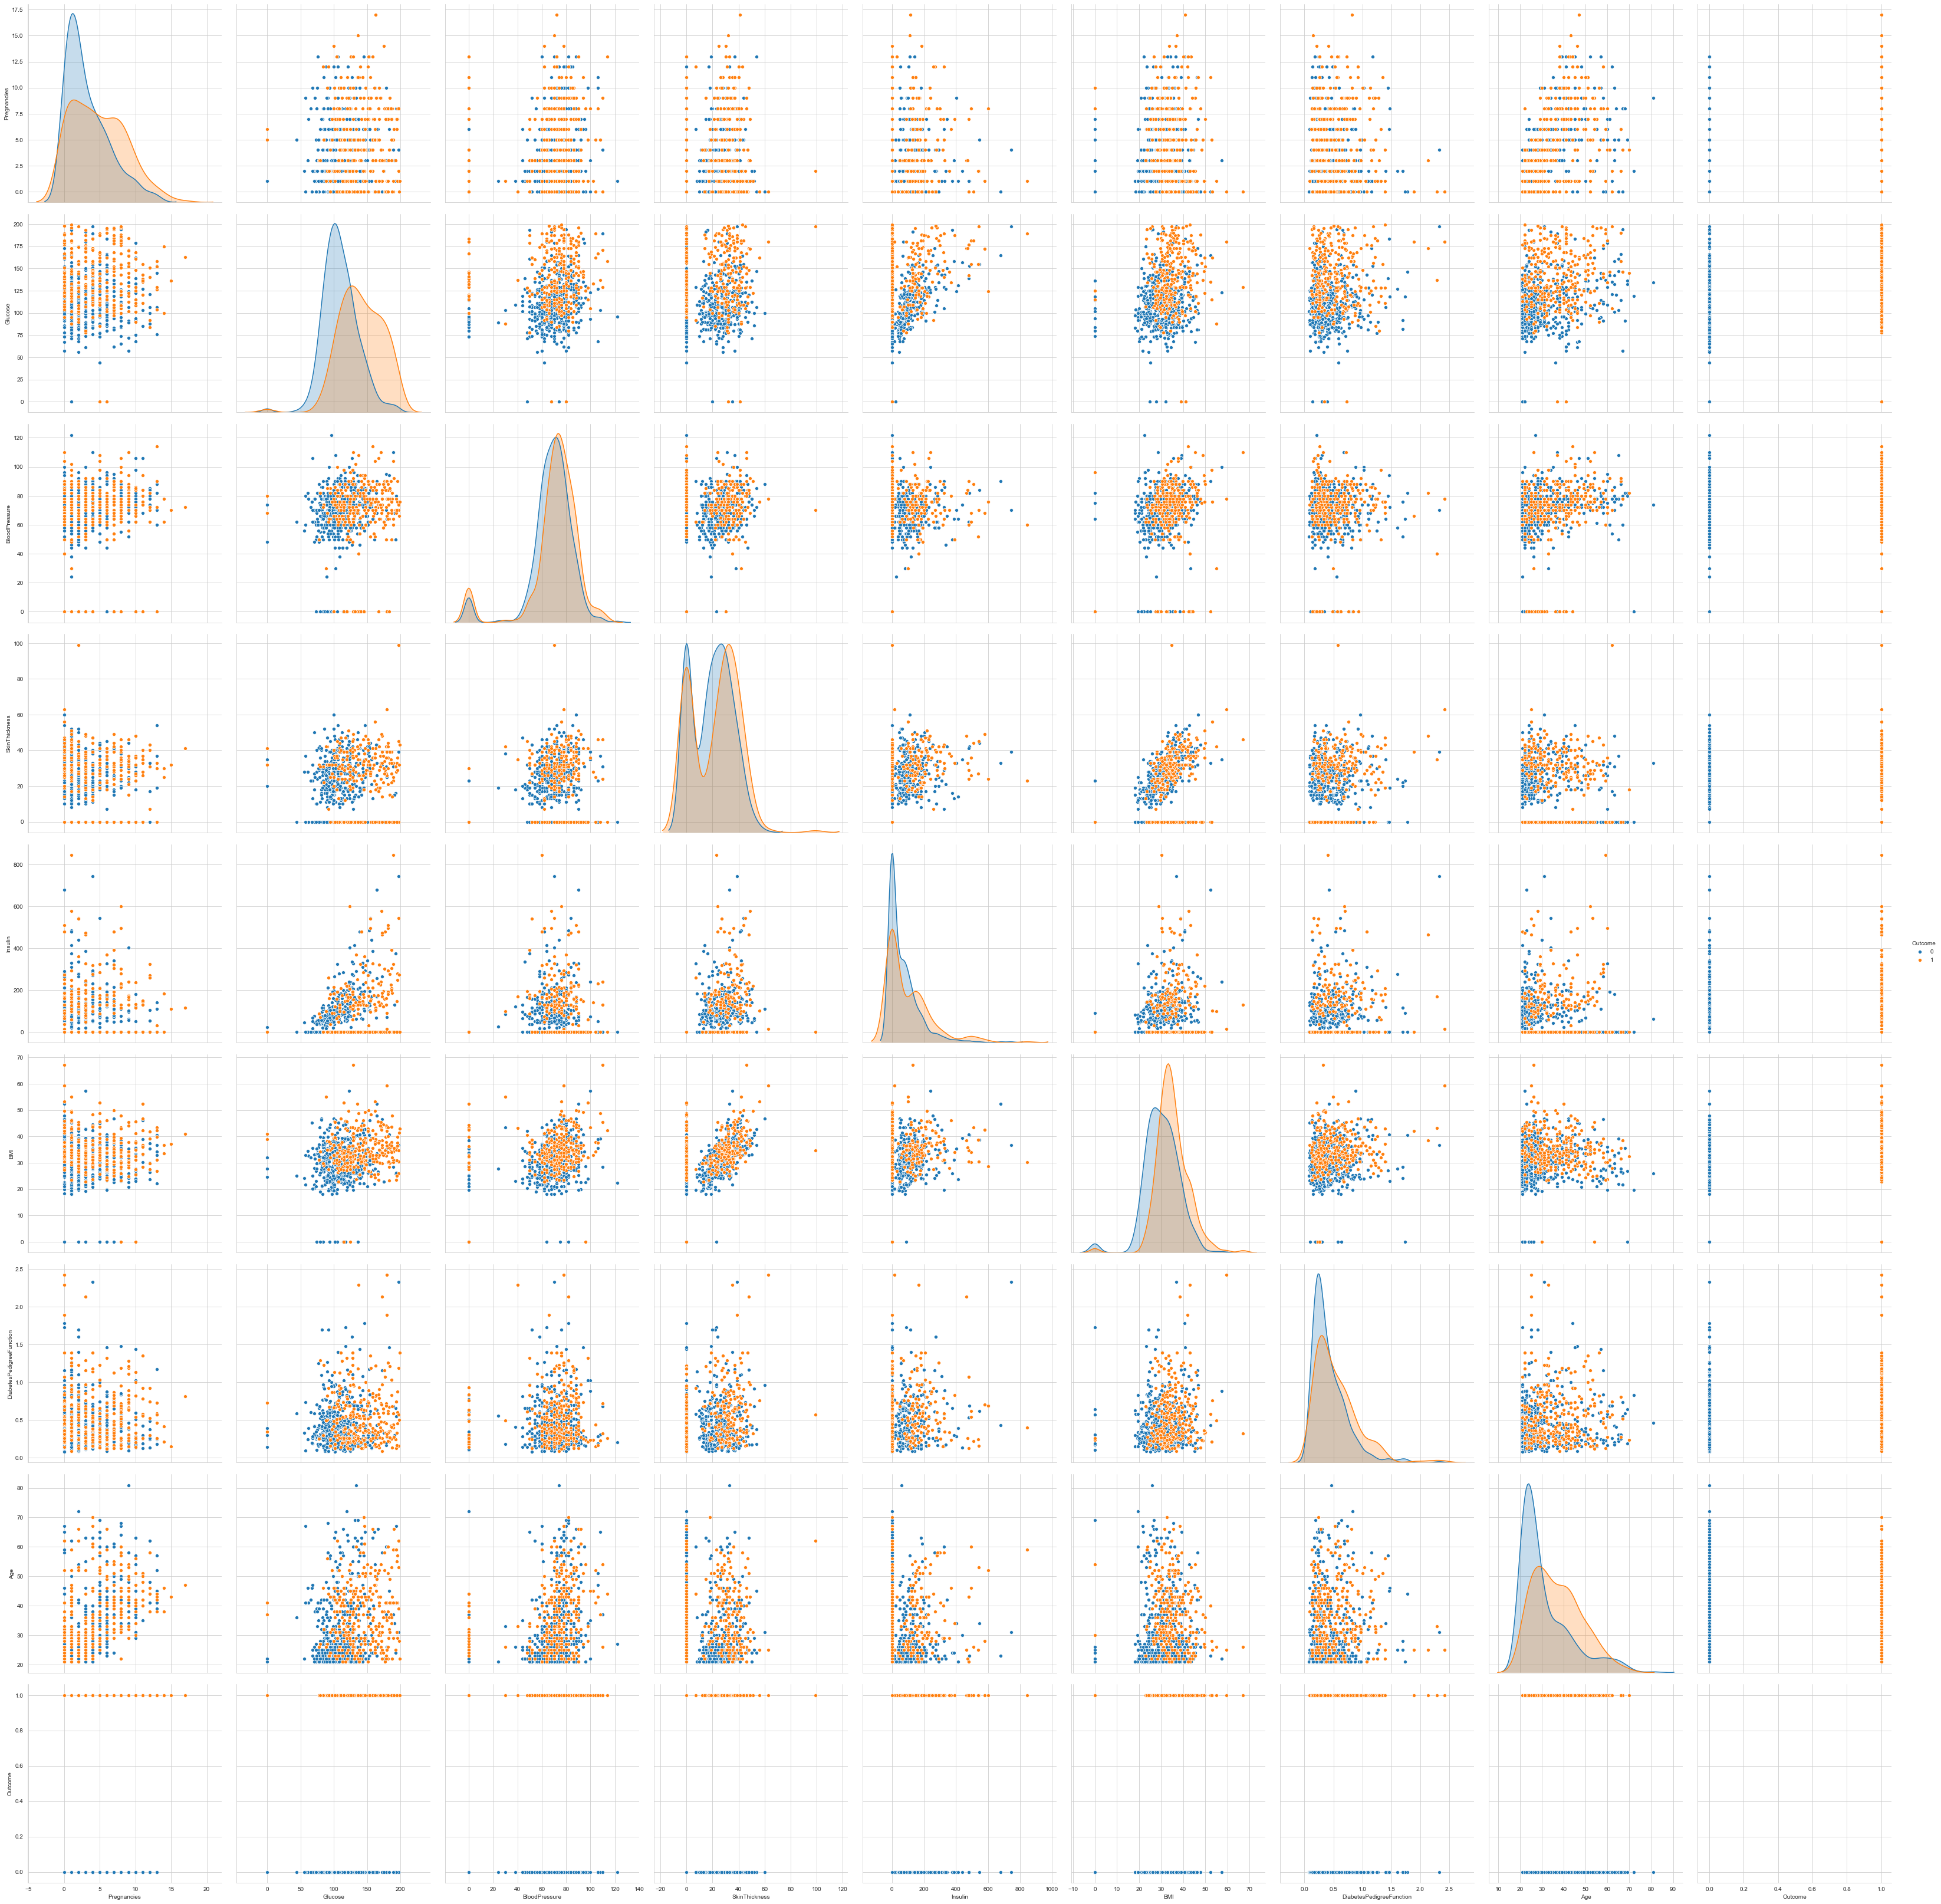

In [82]:
# pairwise scatter plot: Pair-Plot
plt.close();
sns.pairplot(df, hue="Outcome", height=5);
plt.show()


* Can not be used when number of features are high.
* Cannot visualize higher dimensional patterns in 3-D and 4-D. 
* Only possible to view 2D patterns.
* Diagonal Value is the PDF plot
* Pair Plot can be useful when number of feature is less

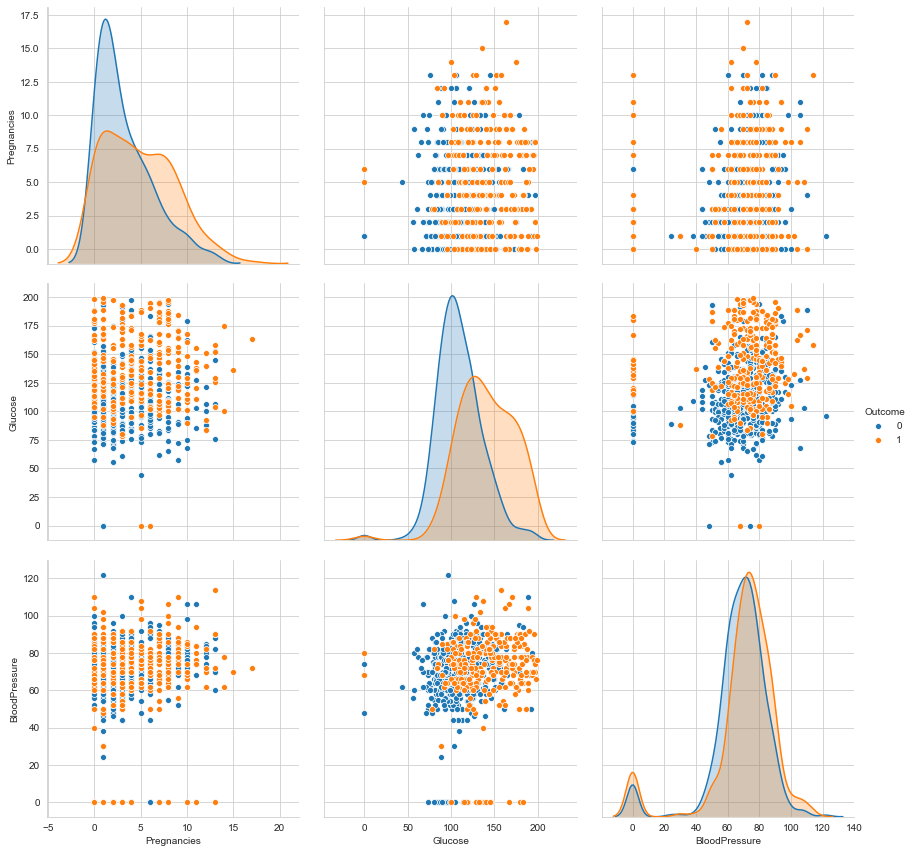

In [85]:
# Implementing Pair Plot by passing limited number feature
sns.pairplot(df,hue="Outcome", height=4, vars=['Pregnancies', 'Glucose', 'BloodPressure'])

Now here we have limit the number of feature to see the plots efficiently. We can pass the name of feture as per our interest

## Histogram, PDF, CDF (Univariate Analysis)

Here We are trying to visualize 1D-Plot


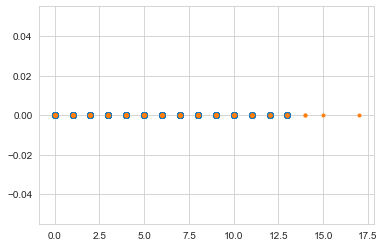

In [103]:
# Dividing both Diabetic and Non Diabetic Patients for visualization
df_diabetic = df.loc[df["Outcome"] == 0]; 
df_non_diabetic = df.loc[df["Outcome"] == 1]; 

plt.plot(df_diabetic["Pregnancies"], np.zeros_like(df_diabetic["Pregnancies"]), 'o')
plt.plot(df_non_diabetic["Pregnancies"], np.zeros_like(df_non_diabetic["Pregnancies"]), '.')
plt.show()

As we can see values are overlapping for single feature of two class So it is hard to Interpret. We will look for other alternatives.

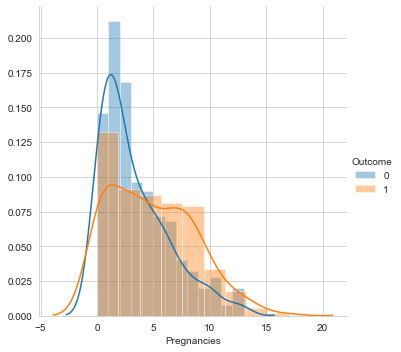

In [104]:
sns.FacetGrid(df, hue="Outcome", height=5).map(sns.distplot, "Pregnancies").add_legend();
plt.show();

This Plot includes PDF and Histogram of feature Pregenancies for both class. Similarly we can draw PDFs of each feature for both class seperately to have an insight of data correspond to each feature.
Just wanted to include here we can have one feature for multiple class like for more than 2 class as well. 

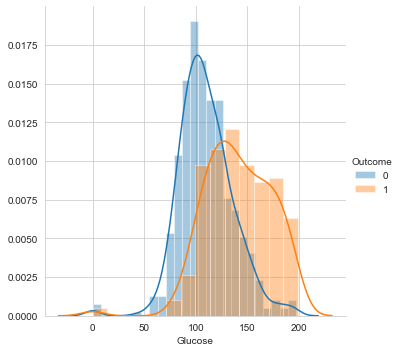

In [105]:
sns.FacetGrid(df, hue="Outcome", height=5).map(sns.distplot, "Glucose").add_legend();
plt.show();

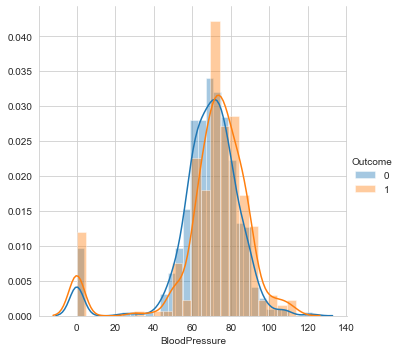

In [106]:
sns.FacetGrid(df, hue="Outcome", height=5).map(sns.distplot, "BloodPressure").add_legend();
plt.show();

* Do some of these plots look like a bell-curve.
* Gaussian/Normal distribution.
* What is "normal" about normal distribution?
* There is a variation of PDF as well knows as PMF

### Need of CDF

Can we say by seeing the plot that what % of pregnencies of diabetic patient having less than certain values

Plotting PDF and CDF


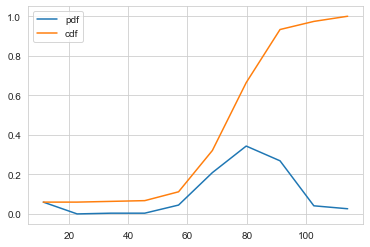

In [149]:
hist, bins = np.histogram(df_non_diabetic['BloodPressure'], bins=10,density = True)
# Normalizing values to get proba values
pdf = hist/(sum(hist))

# Computing value for CDF (Cumulative Sum)
cdf = np.cumsum(pdf)
print("Plotting PDF and CDF")
plt.plot(bins[1:],pdf,label='pdf');
plt.plot(bins[1:], cdf, label='cdf')
plt.legend()
plt.show();


So We can observe with the CDF here that 80% of Non - Diabetic Patient have less than 83 Bloop Pressure.

In [7]:
# Plots of CDF of Insulin for both diabetic and non-diabetic patients.

# Non-Diabetic
counts, bin_edges = np.histogram(df_non_diabetic['Insulin'], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = 'PDF Non-Diabetic')
plt.plot(bin_edges[1:], cdf, label = 'CDF Non-Diabetic')


# Diabetic
counts, bin_edges = np.histogram(df_diabetic['Insulin'], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'PDF Diabetic')
plt.plot(bin_edges[1:], cdf, label = 'CDF Diabetic')
plt.legend()
plt.show();

NameError: name 'df_non_diabetic' is not defined

### Mean, Median, Variance and Std-dev , Percentile, Quantile, IQR

In [173]:
import random
#Mean, Variance, Std-deviation
# print(df_diabetic['Insulin'].describe())

print("Means:")
print(np.mean(df_diabetic['Insulin']))

#Mean with an outlier.
print('#Mean with an outlier.')
print(np.mean(np.append(df_diabetic['Insulin'],2000)));

print("\nStd-dev:");
print(np.std(df_diabetic['Insulin']))

#Formula for std
# sigma = sdt_dev = sqrt(sum((x-mean)^2)/n)


#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(df_diabetic['Insulin']))

#Median with an outlier
print('Median with an outlier')
print(np.median(np.append(df_diabetic['Insulin'],2000)));


print("\nQuantiles:")
print(np.percentile(df_diabetic['Insulin'],np.arange(0, 100, 25)))
print(np.percentile(df_non_diabetic['Insulin'],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(df_diabetic['Insulin'],99))
print(np.percentile(df_non_diabetic['Insulin'],99))


Means:
68.792
#Mean with an outlier.
72.64670658682634

Std-dev:
98.76637452088617

Medians:
39.0
Median with an outlier
40.0

Quantiles:
[  0.   0.  39. 105.]
[  0.     0.     0.   167.25]

90th Percentiles:
440.39999999999964
554.8799999999994


### Box Plot, Voilin Plot and Joint Plot

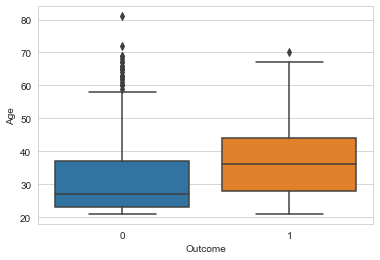

In [175]:
sns.boxplot(x='Outcome',y='Age', data=df)
plt.show()

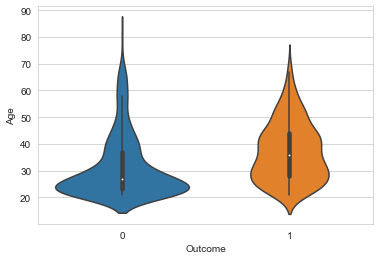

In [179]:
sns.violinplot(x="Outcome", y="Age", data=df, size=15)
plt.show()

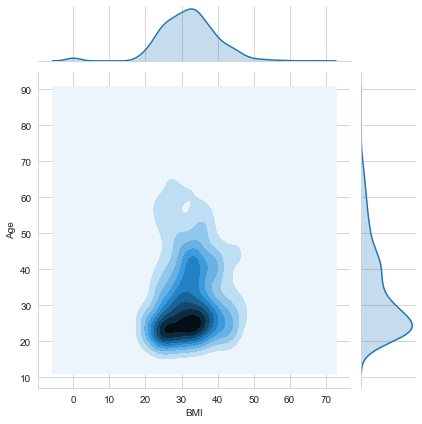

In [180]:
#2D Density plot, contors-plot
sns.jointplot(x="BMI", y="Age", data=df, kind="kde");
plt.show();


## Hypothesis Explanation

In [ ]:
# Example:

#     Height1 : 50 C1  
#     height2 : 50 C2  

#         mean1(hei1) = 60
#         mean2(hei2) = 50
        
#     Q is there any diff in height of C1 and C2 students:
        
#         1: Test Stastict (Exer):
#              mean_diff_ober=60-50 = 10
#         2: Define Null Hyp:
#                 H_0 = There is no differe in mean(h1) and mean(h2)
#                 H_1 = There is differe
#         3. Check p-values: (siginficance level (alpha)):
#                 0.05
#                 let p-val = 0.9 (Assumption)
#                 as p-valu > 0.05
#                     accept (null_Value)

                    

# # Resampling and Permutaion Test (For Calculation of p-valu)
# Pop = [heaght1 + heigth2] # 100 values (Randomply)
# Random_Sample1 = [50 from pop, 50 from pop] # Randomly mean_rand_sample_diff1 = delta1 
# Random_Sample2 = [50 from pop, 50 from pop] # Randomly mean_rand_sample_diff1 = delta2
# Random_Sample3 = [50 from pop, 50 from pop] # Randomly mean_rand_sample_diff1 = delta3
# Random_Sample4 = [50 from pop, 50 from pop] # Randomly mean_rand_sample_diff1 = delta4
# Random_Sample5 = [50 from pop, 50 from pop] # Randomly mean_rand_sample_diff1 = delta5
# ...................................................
# .....................................................

# Random_Sample100 = [50 from pop, 50 from pop] # Randomly mean_rand_sample_diff1 = delta100

                    
# Sort the value of delta in ascending order:
    
# delta1 > delta2 > delta3...............mean_diff_ober.........> delta1000
#    9      9.1      9.5                                100 value after mean_diff_ober
    
#     10% of value is greater the mean_diff_ober
#     p = 0.1


    
# delta1 to delta100


# delta ~ = N(0,1)
                    
                    
# Coin_Toss Example

# prob: given a fair coid, if the coin is biased towards heads or not?
#     P(h) = 0.5 # Fair Coin
#     p(h) > 0.5  # Baised Coin
    
#     1. Test Stastic(Exper):
#         Flip a coin 5 times and count # the heads
#         Asssumed(Let):
#             All values are head (oberved)
#             5 time head
#     2. H_0 : Coin is not baised towards head 
# #         p-val(obser|H_0) is easy to compute
#     3. p_value:
#         p(x = 5 | H_0) = 1/2^5 = 1/32 = 0.03  = 3%
#         p(x = 5 | H_0) = 3%
#         p - value < 5%
        
#         Coin is biased towards head..
        
        
# people assume
# p-value(H_0) = Wrong

# p_value(observation | H_0) = Right

# Fair Dice
# prob(1) = 1/6
# Two Fair 
# prob(2|)